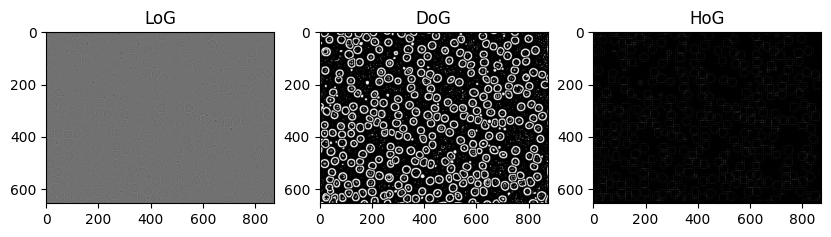

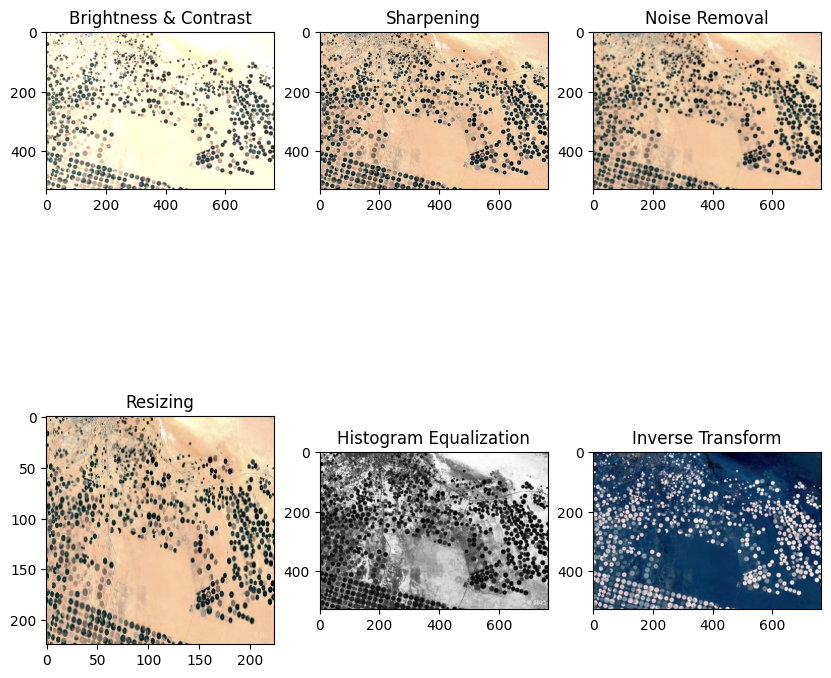

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


100%|██████████| 9.91M/9.91M [00:00<00:00, 53.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.68MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 13.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.71MB/s]

Setup Complete. Ready for training and further analysis.


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torchvision
import torchvision.transforms as transforms
from skimage import filters, feature
from skimage.io import imread
from skimage.transform import resize
from torch.utils.data import DataLoader
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load images
microscope_img = cv2.imread('microscope.jpg', 0)
satellite_img = cv2.imread('satellite_image.jpg')

# Blob Detection
## LoG (Laplacian of Gaussian)
log_image = filters.laplace(microscope_img)
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(log_image, cmap='gray')
plt.title("LoG")

## DoG (Difference of Gaussian)
dog_image = cv2.GaussianBlur(microscope_img, (9, 9), 2) - cv2.GaussianBlur(microscope_img, (9, 9), 5)
plt.subplot(1, 3, 2)
plt.imshow(dog_image, cmap='gray')
plt.title("DoG")

## HoG (Histogram of Oriented Gradients)
hog_features, hog_image = feature.hog(microscope_img, visualize=True)
plt.subplot(1, 3, 3)
plt.imshow(hog_image, cmap='gray')
plt.title("HoG")
plt.show()

# Image Quality Enhancement
## Brightness & Contrast
bright_img = cv2.convertScaleAbs(satellite_img, alpha=1.2, beta=30)
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB))
plt.title("Brightness & Contrast")

## Sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_img = cv2.filter2D(satellite_img, -1, kernel)
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title("Sharpening")

## Noise Removal (Gaussian Blur)
blurred_img = cv2.GaussianBlur(satellite_img, (5, 5), 0)
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
plt.title("Noise Removal")

## Resizing
resized_img = cv2.resize(satellite_img, (224, 224))
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title("Resizing")

## Histogram Equalization
gray_satellite = cv2.cvtColor(satellite_img, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray_satellite)
plt.subplot(2, 3, 5)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalization")

## Image Enhancement - Inverse Transform
inverse_img = cv2.bitwise_not(satellite_img)
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(inverse_img, cv2.COLOR_BGR2RGB))
plt.title("Inverse Transform")
plt.show()

# Image Classification using ResNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
out = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=out)

# Meta-Learning on MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)

print("Setup Complete. Ready for training and further analysis.")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 333s 173ms/step - accuracy: 0.7359 - loss: 0.8375 - val_accuracy: 0.8918 - val_loss: 0.3431
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 361s 192ms/step - accuracy: 0.8894 - loss: 0.3444 - val_accuracy: 0.9196 - val_loss: 0.2544
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 382s 192ms/step - accuracy: 0.9069 - loss: 0.2872 - val_accuracy: 0.9338 - val_loss: 0.2143
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 378s 190ms/step - accuracy: 0.9171 - loss: 0.2577 - val_accuracy: 0.9355 - val_loss: 0.2061
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 322s 172ms/step - accuracy: 0.9226 - loss: 0.2451 - val_accuracy: 0.9286 - val_loss: 0.2206
313/313 - 43s - 138ms/step - accuracy: 0.9286 - loss: 0.2206
Test accuracy: 0.9286


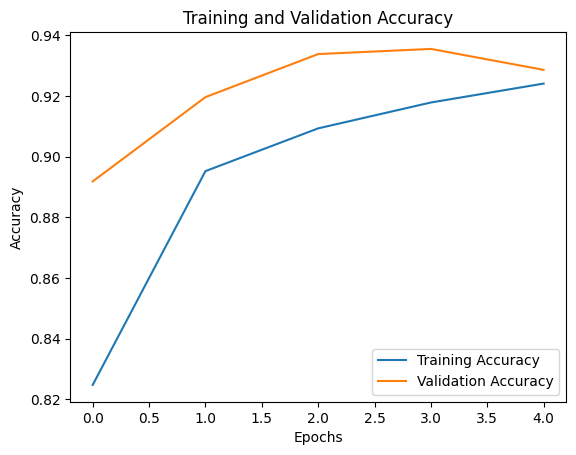

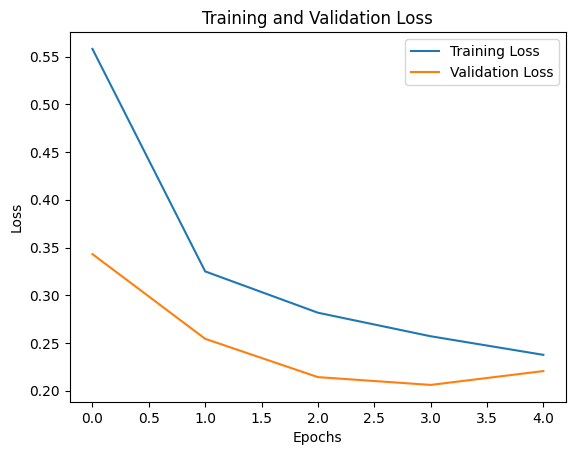

In [17]:
# Install necessary libraries
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Resize the images to 32x32 (ResNet50 expects at least 32x32 images)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

x_train = np.repeat(x_train, 3, axis=-1)  # Convert grayscale to RGB
x_test = np.repeat(x_test, 3, axis=-1)  # Convert grayscale to RGB

# Resize images to 32x32
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Task-2.1: Image Classification using ResNet
# Load the pre-trained ResNet50 model without the top layer (for transfer learning)
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the ResNet layers so that they are not trained
resnet_model.trainable = False

# Build the classification model by adding layers on top of ResNet
model = models.Sequential([
    resnet_model,
    layers.GlobalAveragePooling2D(),  # Pooling to reduce dimensions
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer for classification (10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import random
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing: Normalize data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)
x_test = scaler.transform(x_test.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Task 2.2: Meta-Learning Approach for Few-Shot and One-Shot Learning

# Create Episode Function: Sampling for Few-Shot and One-Shot Learning
def create_episode(x_data, y_data, num_classes=5, num_samples=5, num_query=5):
    """Create an episode with num_classes classes, each having num_samples in the support set and num_query queries."""
    selected_classes = random.sample(range(10), num_classes)

    support_set = []
    query_set = []
    support_labels = []
    query_labels = []

    for class_idx in selected_classes:
        # Find all indices for the current class
        class_indices = np.where(y_data.argmax(axis=1) == class_idx)[0]
        class_images = x_data[class_indices]

        # Ensure that we sample less than the total samples available in each class
        if len(class_images) >= num_samples + num_query:
            support_indices = random.sample(range(len(class_images)), num_samples)
            query_indices = random.sample(list(set(range(len(class_images))) - set(support_indices)), num_query)

            support_set.extend(class_images[support_indices])
            query_set.extend(class_images[query_indices])

            support_labels.extend([class_idx] * num_samples)
            query_labels.extend([class_idx] * num_query)
        else:
            print(f"Skipping class {class_idx} because it doesn't have enough samples.")

    return np.array(support_set), np.array(query_set), np.array(support_labels), np.array(query_labels)

# Prototypical Network (For Few-Shot Learning)
class PrototypicalNetwork(Model):
    def __init__(self):
        super(PrototypicalNetwork, self).__init__()
        self.conv1 = Conv2D(32, (3, 3), activation='relu')
        self.pool1 = MaxPooling2D((2, 2))
        self.conv2 = Conv2D(64, (3, 3), activation='relu')
        self.pool2 = MaxPooling2D((2, 2))
        self.flatten = Flatten()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

# Train Prototypical Network for Few-Shot Learning
def episodic_training(model, x_data, y_data, num_classes=5, num_samples=5, num_query=5, epochs=5):
    for epoch in range(epochs):
        support_set, query_set, support_labels, query_labels = create_episode(x_data, y_data, num_classes, num_samples, num_query)

        # Train on the support set and evaluate on the query set
        with tf.GradientTape() as tape:
            support_set = tf.convert_to_tensor(support_set, dtype=tf.float32)
            query_set = tf.convert_to_tensor(query_set, dtype=tf.float32)
            support_labels = tf.convert_to_tensor(support_labels, dtype=tf.int32)
            query_labels = tf.convert_to_tensor(query_labels, dtype=tf.int32)

            # Forward pass through the network for support set and query set
            support_preds = model(support_set)
            query_preds = model(query_set)

            # Compute loss (cross-entropy) for the query set
            loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(query_labels, query_preds))

        # Compute gradients and apply the updates
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer = tf.optimizers.Adam()
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}')

# Task 4: One-Shot Learning with Matching Networks
class MatchingNetwork(Model):
    def __init__(self):
        super(MatchingNetwork, self).__init__()
        self.conv1 = Conv2D(32, (3, 3), activation='relu')
        self.pool1 = MaxPooling2D((2, 2))
        self.conv2 = Conv2D(64, (3, 3), activation='relu')
        self.pool2 = MaxPooling2D((2, 2))
        self.flatten = Flatten()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

# Train Matching Network for One-Shot Learning
def one_shot_training(model, x_data, y_data, num_classes=5, num_samples=5, num_query=1, epochs=5):
    for epoch in range(epochs):
        support_set, query_set, support_labels, query_labels = create_episode(x_data, y_data, num_classes, num_samples, num_query)

        # Train on the support set and evaluate on the query set
        with tf.GradientTape() as tape:
            support_set = tf.convert_to_tensor(support_set, dtype=tf.float32)
            query_set = tf.convert_to_tensor(query_set, dtype=tf.float32)
            support_labels = tf.convert_to_tensor(support_labels, dtype=tf.int32)
            query_labels = tf.convert_to_tensor(query_labels, dtype=tf.int32)

            # Forward pass through the network for support set and query set
            support_preds = model(support_set)
            query_preds = model(query_set)

            # Compute loss (cross-entropy) for the query set
            loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(query_labels, query_preds))

        # Compute gradients and apply the updates
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer = tf.optimizers.Adam()
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}')

# Initialize Prototypical Network and Train
proto_net = PrototypicalNetwork()
proto_net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
episodic_training(proto_net, x_train, y_train, epochs=5)

# Initialize Matching Network and Train
matching_net = MatchingNetwork()
matching_net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
one_shot_training(matching_net, x_train, y_train, epochs=5)

# Evaluation on Test Set (Example)
test_preds_proto = proto_net(x_test)
test_preds_matching = matching_net(x_test)

# Convert predicted classes to labels
test_labels = np.argmax(y_test, axis=1)
test_preds_proto = np.argmax(test_preds_proto, axis=1)
test_preds_matching = np.argmax(test_preds_matching, axis=1)

# Accuracy evaluation
accuracy_proto = accuracy_score(test_labels, test_preds_proto)
accuracy_matching = accuracy_score(test_labels, test_preds_matching)

print(f'Prototypical Network Test Accuracy: {accuracy_proto * 100:.2f}%')
print(f'Matching Network Test Accuracy: {accuracy_matching * 100:.2f}%')


Epoch 1/5, Loss: 2.286985158920288
Epoch 2/5, Loss: 2.251782178878784
Epoch 3/5, Loss: 2.204002857208252
Epoch 4/5, Loss: 2.3693413734436035
Epoch 5/5, Loss: 2.2836246490478516
Epoch 1/5, Loss: 2.2890002727508545
Epoch 2/5, Loss: 2.307223081588745
Epoch 3/5, Loss: 2.22501802444458
Epoch 4/5, Loss: 2.3469958305358887
Epoch 5/5, Loss: 2.3531980514526367
Prototypical Network Test Accuracy: 21.78%
Matching Network Test Accuracy: 25.75%
